In [9]:
import sys, os #imp
sys.path.append('..')
import pandas as pd
import yaml
import backtesting as bt
import matplotlib.pyplot as plt
import numpy as np
from tools.instruments import instruments

In [2]:
%load_ext autoreload
%aimport backtesting.system
%aimport backtesting.trader
%aimport tools.quotes
%aimport backtesting.trades
%autoreload 2

In [3]:
plt.ioff()

In [38]:
with open('systems/emacross.yaml', encoding='utf-8') as f:
    system1 = yaml.load(f, Loader=yaml.FullLoader)
    print(system1)

{'name': 'emacross', 'description': '시스템 설명', 'sectors': 'default', 'instruments': ['NQ', 'W'], 'from_date': '2018-01-01', 'to_date': None, 'principal': 100000, 'heat_system': 'DefaultHeat', 'max_system_heat': 0.5, 'max_sector_heat': 0.2, 'max_trade_heat': 0.1, 'max_lots': 1, 'commission': 2.99, 'skid': 20, 'allow_pyramiding': False, 'metrics': [['ema50', 'EMA', 'window=50'], ['ema200', 'EMA', 'window=200'], ['volatility', 'ATR', 'window=30'], ['min50', 'MIN', 'window=50'], ['max20', 'MAX', 'window=20']], 'entry_rule': {'long': 'ema50>ema200', 'short': None}, 'exit_rule': {'long': 'low<min50', 'short': None}, 'stop_rule': {'long': 'min50', 'short': None}}


In [39]:
trader = bt.Trader(systems=[system1])
system = trader.systems[0]
trader.run()

매매시작
거래일: 2018-01-02 00:00:00, 시스템: emacross
거래일: 2018-01-03 00:00:00, 시스템: emacross
거래일: 2018-01-04 00:00:00, 시스템: emacross
거래일: 2018-01-05 00:00:00, 시스템: emacross
거래일: 2018-01-08 00:00:00, 시스템: emacross
거래일: 2018-01-09 00:00:00, 시스템: emacross
거래일: 2018-01-10 00:00:00, 시스템: emacross
거래일: 2018-01-11 00:00:00, 시스템: emacross
거래일: 2018-01-12 00:00:00, 시스템: emacross
거래일: 2018-01-15 00:00:00, 시스템: emacross
거래일: 2018-01-16 00:00:00, 시스템: emacross
거래일: 2018-01-17 00:00:00, 시스템: emacross
거래일: 2018-01-18 00:00:00, 시스템: emacross
거래일: 2018-01-19 00:00:00, 시스템: emacross
거래일: 2018-01-22 00:00:00, 시스템: emacross
거래일: 2018-01-23 00:00:00, 시스템: emacross
거래일: 2018-01-24 00:00:00, 시스템: emacross
거래일: 2018-01-25 00:00:00, 시스템: emacross
거래일: 2018-01-26 00:00:00, 시스템: emacross
거래일: 2018-01-29 00:00:00, 시스템: emacross
거래일: 2018-01-30 00:00:00, 시스템: emacross
거래일: 2018-01-31 00:00:00, 시스템: emacross
거래일: 2018-02-01 00:00:00, 시스템: emacross
거래일: 2018-02-02 00:00:00, 시스템: emacross
거래일: 2018-02-05 00:00:00, 시스템: emac

거래일: 2018-12-24 00:00:00, 시스템: emacross
거래일: 2018-12-26 00:00:00, 시스템: emacross
거래일: 2018-12-27 00:00:00, 시스템: emacross
거래일: 2018-12-28 00:00:00, 시스템: emacross
거래일: 2018-12-31 00:00:00, 시스템: emacross
거래일: 2019-01-02 00:00:00, 시스템: emacross
거래일: 2019-01-03 00:00:00, 시스템: emacross
거래일: 2019-01-04 00:00:00, 시스템: emacross
거래일: 2019-01-07 00:00:00, 시스템: emacross
거래일: 2019-01-08 00:00:00, 시스템: emacross
거래일: 2019-01-09 00:00:00, 시스템: emacross
거래일: 2019-01-10 00:00:00, 시스템: emacross
거래일: 2019-01-11 00:00:00, 시스템: emacross
거래일: 2019-01-14 00:00:00, 시스템: emacross
거래일: 2019-01-15 00:00:00, 시스템: emacross
거래일: 2019-01-16 00:00:00, 시스템: emacross
거래일: 2019-01-17 00:00:00, 시스템: emacross
거래일: 2019-01-18 00:00:00, 시스템: emacross
거래일: 2019-01-21 00:00:00, 시스템: emacross
거래일: 2019-01-22 00:00:00, 시스템: emacross
거래일: 2019-01-23 00:00:00, 시스템: emacross
거래일: 2019-01-24 00:00:00, 시스템: emacross
거래일: 2019-01-25 00:00:00, 시스템: emacross
거래일: 2019-01-28 00:00:00, 시스템: emacross
거래일: 2019-01-29 00:00:00, 시스템: emacross


거래일: 2020-03-20 00:00:00, 시스템: emacross
거래일: 2020-03-23 00:00:00, 시스템: emacross
거래일: 2020-03-24 00:00:00, 시스템: emacross
거래일: 2020-03-25 00:00:00, 시스템: emacross
거래일: 2020-03-26 00:00:00, 시스템: emacross
거래일: 2020-03-27 00:00:00, 시스템: emacross
거래일: 2020-03-30 00:00:00, 시스템: emacross
거래일: 2020-03-31 00:00:00, 시스템: emacross
거래일: 2020-04-01 00:00:00, 시스템: emacross
거래일: 2020-04-02 00:00:00, 시스템: emacross
거래일: 2020-04-03 00:00:00, 시스템: emacross
거래일: 2020-04-06 00:00:00, 시스템: emacross
거래일: 2020-04-07 00:00:00, 시스템: emacross
거래일: 2020-04-08 00:00:00, 시스템: emacross
거래일: 2020-04-09 00:00:00, 시스템: emacross
거래일: 2020-04-13 00:00:00, 시스템: emacross
거래일: 2020-04-14 00:00:00, 시스템: emacross
거래일: 2020-04-15 00:00:00, 시스템: emacross
거래일: 2020-04-16 00:00:00, 시스템: emacross
거래일: 2020-04-17 00:00:00, 시스템: emacross
거래일: 2020-04-20 00:00:00, 시스템: emacross
거래일: 2020-04-21 00:00:00, 시스템: emacross
거래일: 2020-04-22 00:00:00, 시스템: emacross
거래일: 2020-04-23 00:00:00, 시스템: emacross
거래일: 2020-04-24 00:00:00, 시스템: emacross


거래일: 2021-03-25 00:00:00, 시스템: emacross
거래일: 2021-03-26 00:00:00, 시스템: emacross
거래일: 2021-03-29 00:00:00, 시스템: emacross
거래일: 2021-03-30 00:00:00, 시스템: emacross
거래일: 2021-03-31 00:00:00, 시스템: emacross
거래일: 2021-04-01 00:00:00, 시스템: emacross
거래일: 2021-04-02 00:00:00, 시스템: emacross
거래일: 2021-04-05 00:00:00, 시스템: emacross
거래일: 2021-04-06 00:00:00, 시스템: emacross
거래일: 2021-04-07 00:00:00, 시스템: emacross
거래일: 2021-04-08 00:00:00, 시스템: emacross
거래일: 2021-04-09 00:00:00, 시스템: emacross
거래일: 2021-04-12 00:00:00, 시스템: emacross
거래일: 2021-04-13 00:00:00, 시스템: emacross
거래일: 2021-04-14 00:00:00, 시스템: emacross
거래일: 2021-04-15 00:00:00, 시스템: emacross
거래일: 2021-04-16 00:00:00, 시스템: emacross
거래일: 2021-04-19 00:00:00, 시스템: emacross
거래일: 2021-04-20 00:00:00, 시스템: emacross
거래일: 2021-04-21 00:00:00, 시스템: emacross
거래일: 2021-04-22 00:00:00, 시스템: emacross
거래일: 2021-04-23 00:00:00, 시스템: emacross
거래일: 2021-04-26 00:00:00, 시스템: emacross
거래일: 2021-04-27 00:00:00, 시스템: emacross
거래일: 2021-04-28 00:00:00, 시스템: emacross


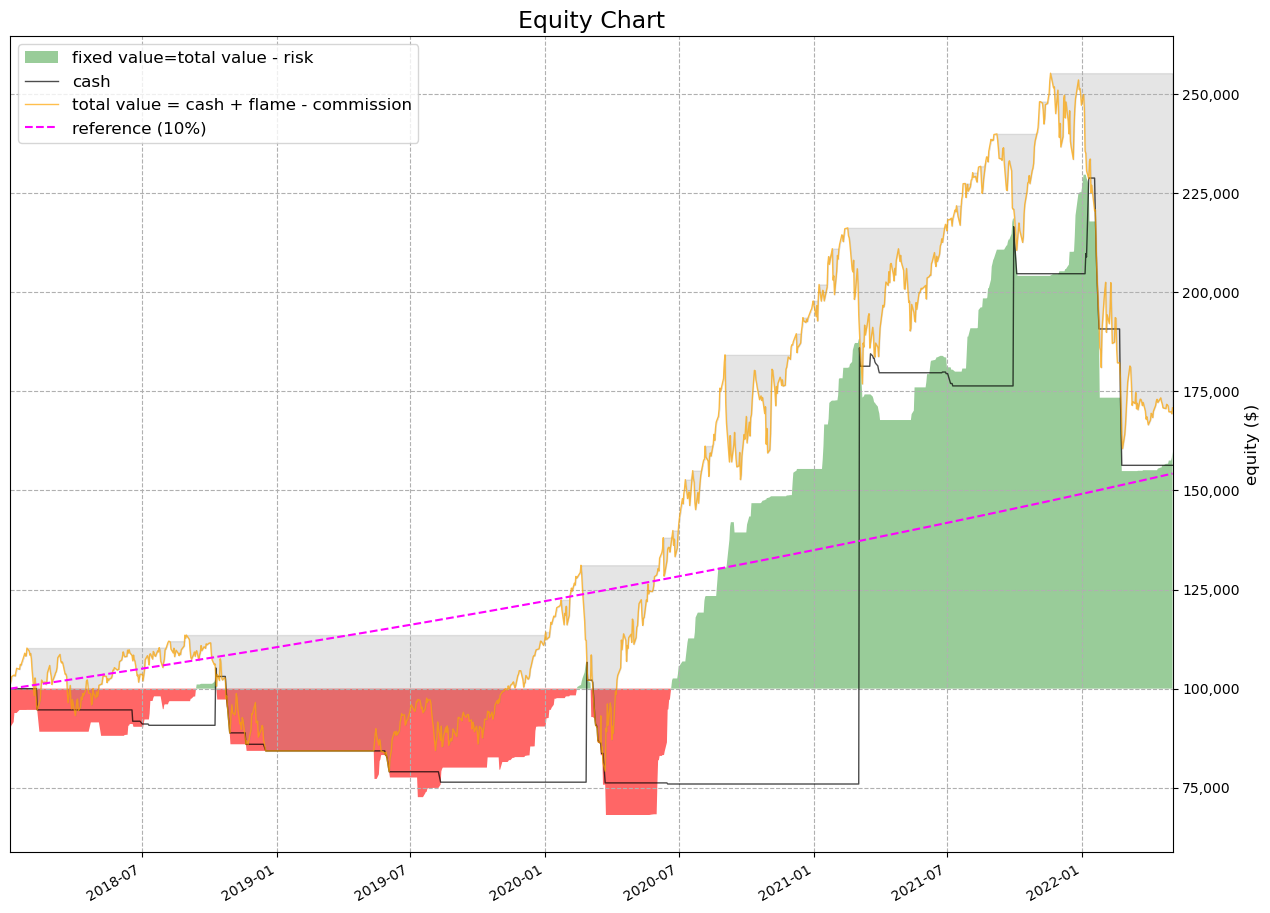

In [40]:
system.create_report()

In [10]:
equitylog = pd.DataFrame(system.equity.log()).set_index('date')
equity = equitylog.groupby(by='date').last()
#x = equity.index.values
x=(equity.index.astype('int64')/1000000).values
total_value = equity.capital.round()
defined_value = equity.fixed_capital.round()
max_value = equity.max_capital.round()
cash = (total_value - equity.flame).round()

In [11]:
#reference curve
rate = 0.1 #annual interest rate
refx = equity.index.values
refx = (refx-refx[0])/np.timedelta64(365,'D')
refy = equity.principal*np.exp(rate*refx)

In [12]:
defined_value_p = defined_value.copy()
defined_value_p[defined_value<equity.principal]=equity.principal

defined_value_n = defined_value.copy()
defined_value_n[defined_value>equity.principal]=equity.principal

In [13]:
datafile = f"equitydata = {{\
'total_value' :  {list(map(list, zip(x,total_value)))},\
'defined_value_p': {list(map(list, zip(x,defined_value_p)))},\
'defined_value_n': {list(map(list, zip(x,defined_value_n)))},\
'max_value': {list(map(list, zip(x,max_value)))},\
'cash': {list(map(list, zip(x,cash)))},\
'reference':{list(map(list, zip(x,refy)))}\
}}"

In [14]:
with open('equitydata.txt', 'w') as f:
  f.write(datafile)

In [260]:
ohlc = trader.quotes['NQ'].loc[system.from_date:system.to_date][['open','high','low','close']].dropna()

In [264]:
data = ohlc.values.tolist()

In [265]:
with open('ohlcdata.txt', 'w') as f:
  f.write(f"ohlcdata = {str(data)}")

In [228]:
ohlc.tolist()

[[6550.5, 6668.75, 6543.25, 6660.25],
 [6658.75, 6736.75, 6656.75, 6730.0],
 [6729.25, 6763.0, 6725.5, 6749.0],
 [6753.5, 6816.5, 6745.25, 6813.25],
 [6813.25, 6836.25, 6798.75, 6833.5],
 [6832.75, 6852.75, 6812.75, 6832.5],
 [6825.25, 6832.25, 6773.75, 6822.75],
 [6822.0, 6874.25, 6809.75, 6872.0],
 [6871.0, 6923.25, 6848.75, 6920.75],
 [nan, nan, nan, nan],
 [6927.0, 6991.25, 6874.75, 6907.75],
 [6908.25, 6979.75, 6890.25, 6969.25],
 [6963.5, 6983.5, 6941.5, 6958.5],
 [6962.0, 7002.5, 6947.0, 6991.25],
 [6976.25, 7086.75, 6969.75, 7076.5],
 [7075.25, 7126.75, 7065.25, 7111.25],
 [7102.0, 7149.75, 7033.75, 7076.75],
 [7079.0, 7132.75, 7047.5, 7077.0],
 [7083.5, 7180.0, 7079.75, 7175.75],
 [7175.5, 7192.75, 7125.5, 7138.0],
 [7137.0, 7152.0, 7048.25, 7087.0],
 [7083.75, 7136.5, 7067.0, 7108.0],
 [7118.5, 7133.25, 7030.25, 7044.0],
 [7099.5, 7109.0, 6897.75, 6901.25],
 [6897.75, 6959.0, 6533.25, 6574.75],
 [6618.5, 6823.0, 6405.75, 6799.25],
 [6783.5, 6863.25, 6677.5, 6701.25],
 [6687.5

In [45]:
quote = system.quotes['NQ'][['open','high','low','close']]

In [49]:
quote.insert(0, 'date', quote.index.astype('int64')/1000000)

In [50]:
quote.to

field,date,open,high,low,close
date,,,,,
2018-01-02,1.514851e+12,6550.50,6668.75,6543.25,6660.25
2018-01-03,1.514938e+12,6658.75,6736.75,6656.75,6730.00
2018-01-04,1.515024e+12,6729.25,6763.00,6725.50,6749.00
2018-01-05,1.515110e+12,6753.50,6816.50,6745.25,6813.25
2018-01-08,1.515370e+12,6813.25,6836.25,6798.75,6833.50
...,...,...,...,...,...
2022-04-28,1.651104e+12,13191.00,13542.00,13033.00,13454.75
2022-04-29,1.651190e+12,13219.50,13433.00,12831.75,12852.00
2022-05-02,1.651450e+12,12892.25,13084.50,12709.75,13073.00


In [17]:
system.symbols

['NQ']

In [18]:
trader.quotes[system.symbols]

symbol            NQ                                                  
field           open      high       low     close    volume        oi
date                                                                  
1959-08-03       NaN       NaN       NaN       NaN       NaN       NaN
1959-08-04       NaN       NaN       NaN       NaN       NaN       NaN
1959-08-05       NaN       NaN       NaN       NaN       NaN       NaN
1959-08-06       NaN       NaN       NaN       NaN       NaN       NaN
1959-08-07       NaN       NaN       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...       ...       ...
2022-04-28  13191.00  13542.00  13033.00  13454.75  745694.0  231686.0
2022-04-29  13219.50  13433.00  12831.75  12852.00  714282.0  229871.0
2022-05-02  12892.25  13084.50  12709.75  13073.00  755127.0  229251.0
2022-05-03  13051.75  13183.75  12968.50  13087.50  655742.0  228671.0
2022-05-04  13121.00  13555.25  12883.00  13531.25  695273.0  223943.0

[15987 rows x 6 columns]

In [19]:
system.metrics

NQ                                             
                   ema50        ema200 volatility     min50     max20
date                                                                 
1959-08-03           NaN           NaN        NaN       NaN       NaN
1959-08-04           NaN           NaN        NaN       NaN       NaN
1959-08-05           NaN           NaN        NaN       NaN       NaN
1959-08-06           NaN           NaN        NaN       NaN       NaN
1959-08-07           NaN           NaN        NaN       NaN       NaN
...                  ...           ...        ...       ...       ...
2022-04-28  14179.998147  14571.523878   1.085823  12801.50  15198.00
2022-04-29  14127.722770  14554.096841   1.188467  12801.50  15198.00
2022-05-02  14086.210775  14539.088984   1.137733  12709.75  15198.00
2022-05-03  14046.908913  14524.382816   0.996954  12709.75  15198.00
2022-05-04  14026.619173  14514.323124   1.132958  12709.75  14861.25

[15987 rows x 5 columns]

In [236]:
a.insert(0,1)

In [237]:
a

[1, 1, 2, 3]

In [49]:
refx = (x-x[0])/np.timedelta64(365,'D')

In [51]:
refx[-1]

19.145205479452056

In [51]:
c

[[3], 'hh']

In [53]:
b.pop(1)

[3]

In [55]:
b

[[1, 2, 3, 4], 'hh']

In [16]:
starts = {} #첫 거래 시작일
for symbol in ['AD']:
    flag = trader.quotes[symbol][['open','high','low','close']].isna().any(axis=1)
    system.signals.loc[flag, symbol] = np.nan
    starts[symbol] = trader.quotes[symbol][~flag].index[0]

In [17]:
starts

{'AD': Timestamp('1987-01-13 00:00:00')}

In [19]:
flag = trader.quotes['AD'].isna().any(axis=1)

In [27]:
system.signals.first_valid_index()

Timestamp('1987-01-13 00:00:00')

In [31]:
system.signals.index[system.signals.index.get_loc(system.signals.first_valid_index())-1]

Timestamp('1987-01-12 00:00:00')

In [38]:
df=df.iloc[1000]

In [47]:
mask = df.isna().groupby('symbol').any() 

In [51]:
mask[~mask]

symbol
BO    False
C     False
HG    False
W     False
Name: 1963-07-22 00:00:00, dtype: bool

In [60]:
instruments['NQ'].tickunit

0.25

In [55]:
while a:
    print(a.pop())

In [66]:
df=trader.quotes['AD']

In [72]:
df.iloc[0][['open','high','low','close']].notna().all()

False

In [73]:
a=[1,2,3,4]

In [74]:
a.pop(2)

3

In [76]:
for i in a:
    a.remove(i)

In [82]:
system.trades.get_on_fires(symbol='AD')

[]

In [37]:
instruments['W']

[W] CBOT Wheat

In [65]:
df=Quotes(quote['AD'], type='single')

In [67]:
df.MA(window=10, inplace=True)

In [68]:
df

field,open,high,low,close,volume,oi,ma30,ma10
date,,,,,,,,
1959-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-04-28,0.71290,0.71660,0.70595,0.70995,112019.0,144283.0,0.741827,0.727695
2022-04-29,0.71035,0.71845,0.70610,0.70870,124501.0,144179.0,0.740832,0.724340
2022-05-02,0.70710,0.70870,0.70355,0.70415,91807.0,140428.0,0.739580,0.721195


In [73]:
df.columns.levels

AttributeError: 'Index' object has no attribute 'levels'

In [75]:
f=quote.columns

In [88]:
len(f.names)

2

In [81]:
d =df.columns

In [87]:
len(d.names)

1